# Multinomial Perceptron

In [46]:
## Libraries:
library(MASS) # generates multivariate Gaussian sampels
library(ggplot2)
library(reshape2)
library(ggplot2)

## Initialization
set.seed(123)


# The Perceptron
## Steps for Building Perceptron
We take the following steps to build a perceptron:

 1- Choose and implement a basis function $\pmb{\phi}$, and initialize weight vectors $\pmb{w}$ for each class, learning rate $\eta$ and stopping threshold $\epsilon$,

 2- Use the above function and repeat the following until the improvement is superficial (i.e., $|E(\pmb{w}^{(\tau+1)})-E(\pmb{w}^{(\tau)})| < \epsilon$):

* Shuffle the training data

* For each datapoint in the training data do:

 + Classify the sample using the current weight vectors. Highest activation wins, ie Model and Prediction Rule

 + If the sample correctly classified, pick the next point (continue the loop)

 + If the sample misclassified:
   + update the weight vector for the (incorrectly) predicted class by subtracting the sample's coordinates $\pmb{w}^{\tau+1} := \pmb{w}^{\tau} - \eta\phi(\pmb{x}_n)$
   + update the weight vector for the other classes by subtracting the sample's coordinates $\pmb{w}^{\tau+1} := \pmb{w}^{\tau} + \eta\phi(\pmb{x}_n)$

A function to predict the class of a feature vector

In [41]:
# Weights is a list of weight for each class
# X is the feature vector
predictPerceptron <- function( weights, X)
{    
    # every row in Weights is a class
    numClasses = nrow(weights)
        
    maxval = 0.0 
    pred = 1
    for( i in 1:numClasses)
    {     
        val <- (weights[i,]%*%X)
        
        if( val > maxval )
        {
          maxval = val
          pred = i
        }          
    }
    
    pred
}

A function to calculate the error given the current weight vectors, the training data  and the labels

In [42]:
# weights is a list of the weight vectors
# some.data: the feature vectors
# T:  the labels to go with the feature vectors
getErr <- function( weights, some.data, T)
{
    er = 0.0
    for( i in 1:train.len)
    {
        if (predictPerceptron(weights, some.data[i,] ) != T[i] )
        {       
        er <- er + 1.0
        }
    }
            
    (er/length(T))
}

Main loop.
TODO: split the data into test and train sets

In [43]:
################################## 
## multivariate perceptron
###################################

# Initialization
data(iris)
train.len <- nrow(iris)
Phi <- as.matrix(cbind(1, iris[,1:4])) # add a column of 1 as phi_0

eta <- 0.01 # Learning rate
epsilon <- 0.000001 # Stoping criterion
tau.max <-10000 # Maximum number of iterations


iris$T[iris$Species=='setosa' ] <- 1
iris$T[iris$Species=='versicolor' ] <- 2
iris$T[iris$Species=='virginica' ] <- 3
T <- iris$T


# I have initilized these to zero based on an exampe I saw but I guess they could just aswalso be random linke in the above example
Wa <- matrix(0.0,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
Wb <- matrix(0.0,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
Wc <- matrix(0.0,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

# Main Loop (Step 2):
while(!terminate){
    # reshuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]

    for (i in 1:train.len)
    {        
        if (tau == tau.max) 
        {
            break
        }
        
        
        # If I had the weight vectors and their classes in a dictionary this would be a lot more elegant
        
        wan <- (Wa[tau,]%*%Phi[i,])
        wbn <- (Wb[tau,]%*%Phi[i,])
        wcn <- (Wc[tau,]%*%Phi[i,])     
                
        argmax <- max(c(wan,wbn,wcn))        
        
         
        
        if( argmax == wan )
        {            
            if( T[i] !=1)
            {               
                tau <- tau +1                  
            
                Wa[tau,] <- Wa[tau-1,] - eta * Phi[i,] 
                Wb[tau,] <- Wb[tau-1,] + eta * Phi[i,] 
                Wc[tau,] <- Wc[tau-1,] + eta * Phi[i,]                   
                error.trace[tau] <- getErr( t(matrix(c(Wa[tau,],Wb[tau,],Wc[tau,]), ncol=3)), Phi, T )                
            }
        }
        else if ( argmax == wbn )
        {
            if( T[i] != 2)
            {
                tau <- tau +1
          
                Wa[tau,] <- Wa[tau-1,] + eta * Phi[i,] 
                Wb[tau,] <- Wb[tau-1,] - eta * Phi[i,] 
                Wc[tau,] <- Wc[tau-1,] + eta * Phi[i,] 

                error.trace[tau] <- getErr( t(matrix(c(Wa[tau,],Wb[tau,],Wc[tau,]), ncol=3)), Phi, T )    
            }
        }
        else
        {            
            if( T[i] != 3)
            {
                tau <- tau +1
                               
                Wa[tau,] <- Wa[tau-1,] + eta * Phi[i,] 
                Wb[tau,] <- Wb[tau-1,] + eta * Phi[i,] 
                Wc[tau,] <- Wc[tau-1,] - eta * Phi[i,] 
                
                error.trace[tau] <- getErr( t(matrix(c(Wa[tau,],Wb[tau,],Wc[tau,]), ncol=3)), Phi, T )           
            }
        }                   
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    
    ## I have removed this las condition because it terminates processing way too early, even when I drastically decrease the size of epsilon
    #  Maybe we need a smarter boundary. 
    terminate <- tau >= tau.max #| abs(error.trace[tau] - error.trace[tau-1]) <= epsilon     
}


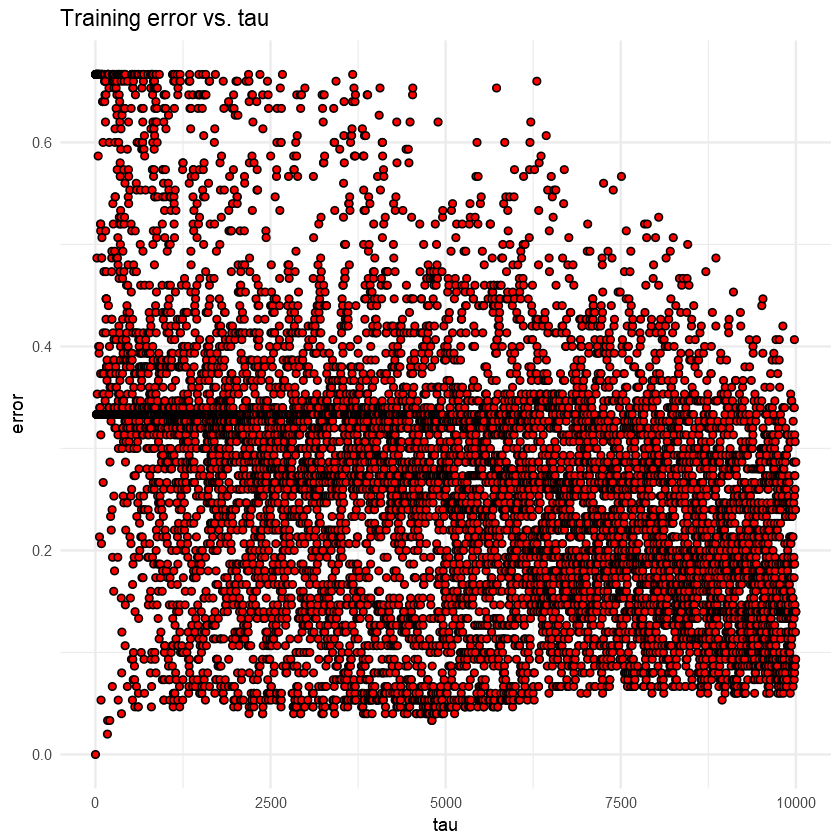

In [44]:
## merging and melting for visualizations
out <- data.frame('tau'=1:tau)
out$error <- error.trace[1:tau]

## Training error
ggplot(data=out,aes(x=tau, y=error)) + 
 geom_point(shape=21, fill='red')  +
    ggtitle('Training error vs. tau') + theme_minimal()

Now display the misclassification rate as a percentage:

In [45]:
getErr( t(matrix(c(Wa[tau,],Wb[tau,],Wc[tau,]), ncol=3)), Phi, T )*100

[1] 14

Finis!